In [2]:
#libaries neede
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import joblib


In [3]:
data = pd.read_csv("loan_data.csv")
data.head()

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,1,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,2,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,3,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,4,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,5,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45000 non-null  int64  
 1   person_age                      45000 non-null  int64  
 2   person_gender                   45000 non-null  object 
 3   person_education                45000 non-null  object 
 4   person_income                   45000 non-null  int64  
 5   person_emp_exp                  45000 non-null  int64  
 6   person_home_ownership           45000 non-null  object 
 7   loan_amnt                       45000 non-null  int64  
 8   loan_intent                     45000 non-null  object 
 9   loan_int_rate                   45000 non-null  float64
 10  loan_percent_income             45000 non-null  float64
 11  cb_person_cred_hist_length      45000 non-null  int64  
 12  credit_score                    

In [5]:
data.describe(include = "all")


,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,22500.500000,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,12990.525394,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,1.000000,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,11250.750000,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,22500.500000,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,33750.250000,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [6]:
print(data.isnull().sum())
print("Duplicates:", data.duplicated().sum())

id                                0
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Duplicates: 0


In [7]:
# selected_cols = [
#     'person_income',
#     'loan_amnt',
#     'loan_int_rate',
#     'loan_percent_income',
#     'credit_score',
#     'loan_status',
# ]

# sns.pairplot(data[selected_cols], hue='loan_status', diag_kind='kde', plot_kws={'alpha': 0.5})
# plt.show()



In [8]:
# Categorical features
cat_features = [
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]


# Numerical features
num_features = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

# Target
target = 'loan_status'


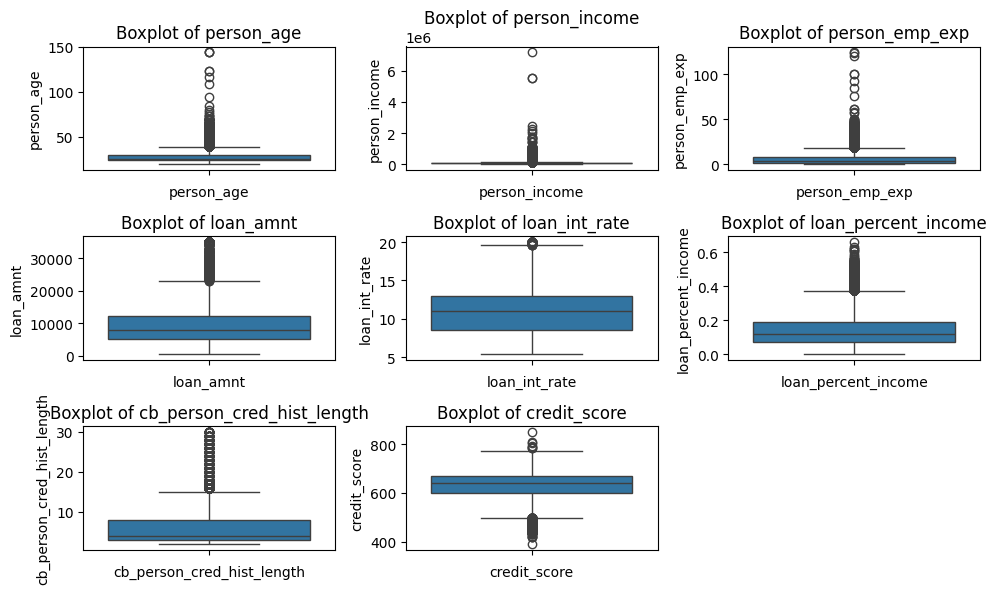

In [9]:
n_features = len(num_features)  
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols  
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)  # 3 rows, 3 columns for 8 plots
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

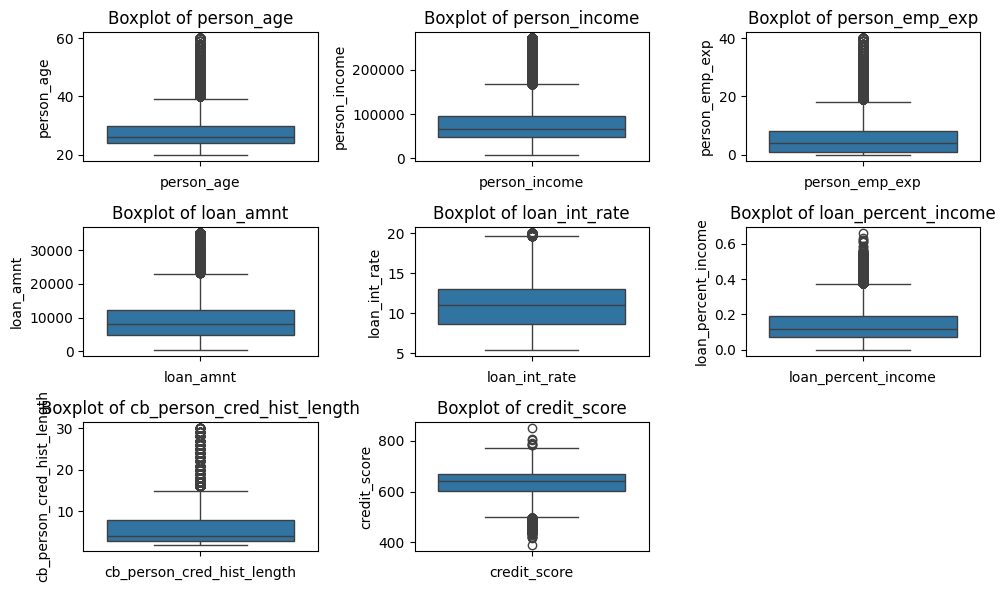

In [10]:
data['person_age'] = data['person_age'].clip(upper=60)
income_cap = data['person_income'].quantile(0.99)
data['person_income'] = data['person_income'].clip(upper=income_cap)
data['person_emp_exp'] = data['person_emp_exp'].clip(upper=40)
n_features = len(num_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

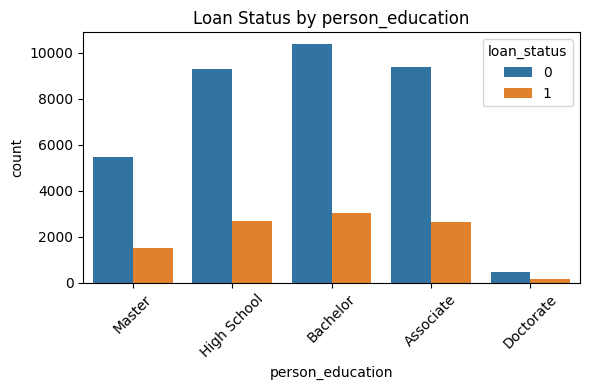

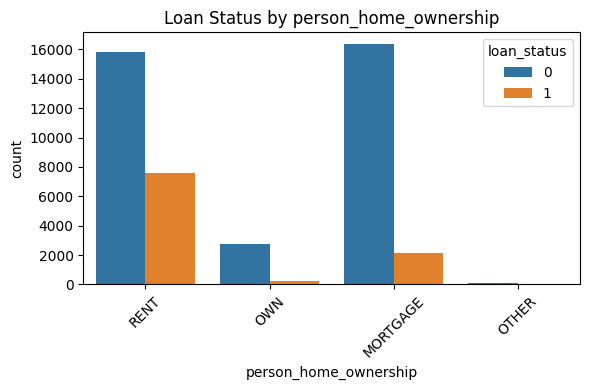

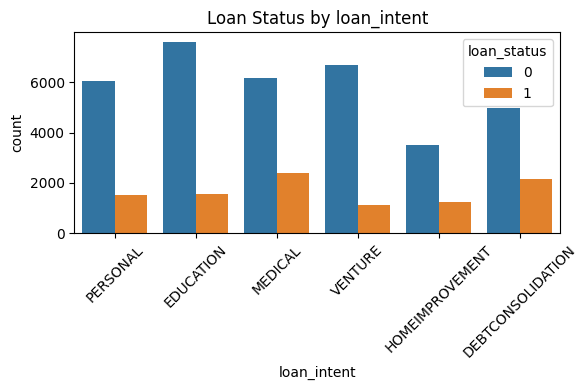

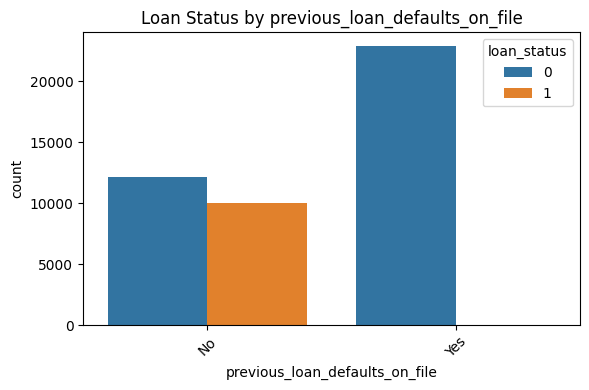

In [11]:
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='loan_status')
    plt.title(f"Loan Status by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

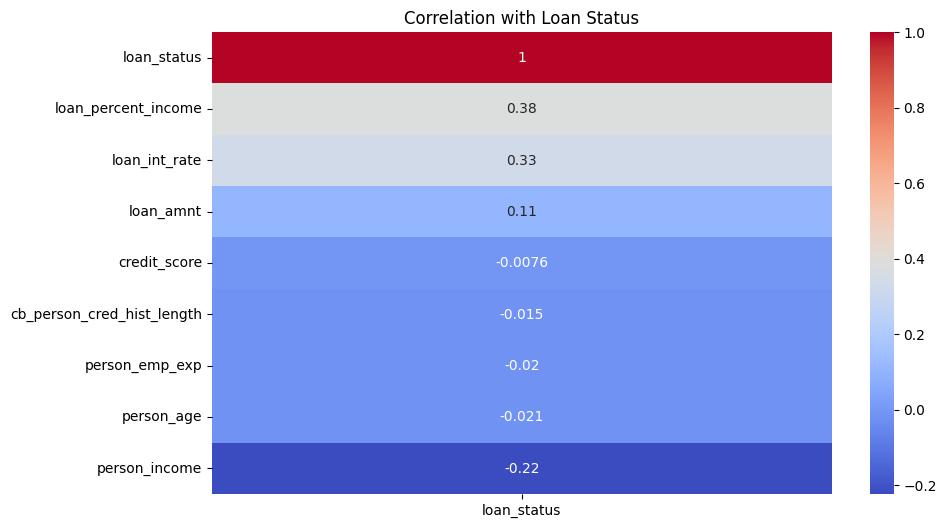

In [12]:
corr_data = data[num_features + [target]]
corr_matrix = corr_data.corr()
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Loan Status")
plt.show()

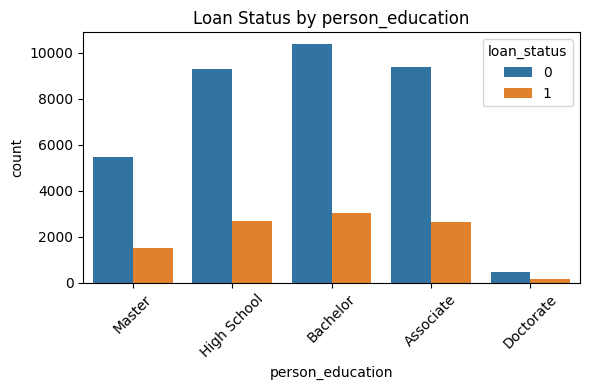

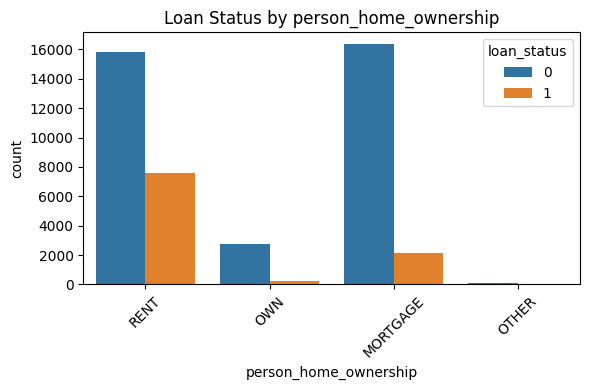

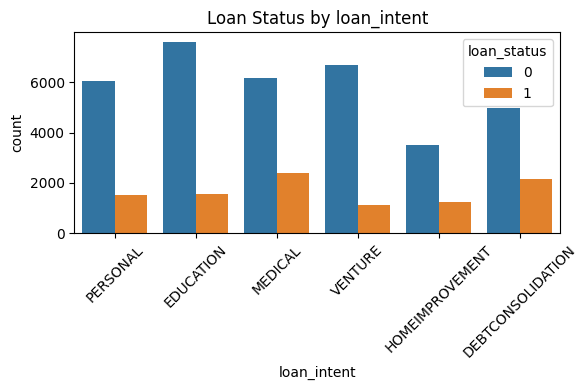

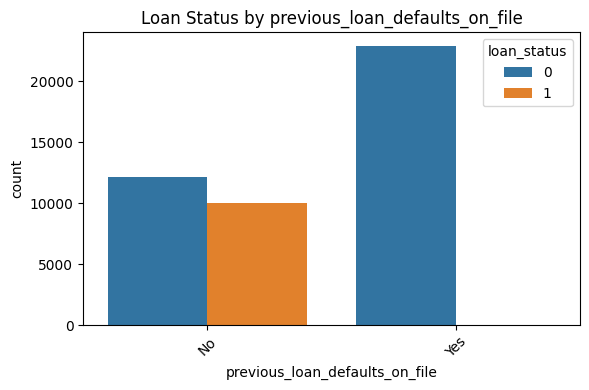

In [13]:
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='loan_status')
    plt.title(f"Loan Status by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [14]:
X = data.drop(columns=[target,'id'])
y = data[target]
data.head()

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,1,22,female,Master,71948.0,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,2,21,female,High School,12282.0,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,3,25,female,High School,12438.0,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,4,23,female,Bachelor,79753.0,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,5,24,male,Master,66135.0,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [15]:
X.shape

(45000, 13)

In [16]:
cat_indices = [X.columns.get_loc(col) for col in [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]]

# Build the transformer
ct = ColumnTransformer(
    transformers=[("categoricals", OneHotEncoder(drop='first'), cat_indices)],
    remainder='passthrough'
)

# Fit-transform the features
X_transformed = ct.fit_transform(X)
X_transformed = X_transformed.astype('float64')

In [17]:
X_transformed.shape

(45000, 22)

In [18]:
from sklearn.preprocessing import StandardScaler

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

# Normalize all features (since they are all numeric now, post-encoding)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_test shape:", X_test.shape)
parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}


X_test shape: (9000, 22)


In [19]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lr = regressor.predict(X_test)
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)

# Logistic Regression
logistic = LogisticRegression(max_iter=5000)
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# KNN with GridSearchCV
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train, y_train)

print("Best KNN params:", grille.best_params_)
print("Best KNN CV score:", grille.best_score_)

# Use best estimator to predict
y_pred_knn = grille.predict(X_test)

# XGBoost
xgboost_model = xgb.XGBClassifier(random_state=0)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"🔎 {model_name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-" * 50)

# Evaluate all models
evaluate_model(y_test, y_pred_lr_class, "Linear Regression (converted)")
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (Tuned)")
evaluate_model(y_test, y_pred_xgboost, "XGBoost")



Best KNN params: {'n_neighbors': 9}
Best KNN CV score: 0.8944444444444445
🔎 Linear Regression (converted)
Accuracy : 0.8917777777777778
Precision: 0.7973052138254247
Confusion Matrix:
 [[6665  346]
 [ 628 1361]]
--------------------------------------------------
🔎 Logistic Regression
Accuracy : 0.893
Precision: 0.7658031088082902
Confusion Matrix:
 [[6559  452]
 [ 511 1478]]
--------------------------------------------------
🔎 Random Forest
Accuracy : 0.9308888888888889
Precision: 0.8999414862492686
Confusion Matrix:
 [[6840  171]
 [ 451 1538]]
--------------------------------------------------
🔎 K-Nearest Neighbors (Tuned)
Accuracy : 0.9
Precision: 0.826634673065387
Confusion Matrix:
 [[6722  289]
 [ 611 1378]]
--------------------------------------------------
🔎 XGBoost
Accuracy : 0.9354444444444444
Precision: 0.8868131868131868
Confusion Matrix:
 [[6805  206]
 [ 375 1614]]
--------------------------------------------------


In [20]:
# =========================================
# 1. Imports (only if not already imported)
from sklearn.pipeline import Pipeline
import joblib

# =========================================
# 2. Redefine raw X and y (in case you lost them)
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# 3. Resplit raw data (to make sure it's clean)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# =========================================
# 4. Define your Categorical and Numerical Columns
cat_features = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

num_features = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

# =========================================
# 5. Build the Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first', sparse=False), cat_features)
])

# =========================================
# 6. Build the Full Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', grille.best_estimator_)  # Best KNN model from GridSearchCV
])

# =========================================
# 7. Reconvert X_train to a clean DataFrame (optional safety)
X_train = pd.DataFrame(X_train, columns=[
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file',
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
])

# =========================================
# 8. Fit the Full Pipeline on raw X_train
pipeline.fit(X_train, y_train)

# =========================================
# 9. Save the Pipeline
joblib.dump(pipeline, 'loan_pipeline.pkl')
print("✅ Full pipeline saved successfully as 'loan_pipeline.pkl'")


✅ Full pipeline saved successfully as 'loan_pipeline.pkl'


C:\Users\sfaxi\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
